In [1]:
# data manipulation
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# random forest regressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, accuracy_score
import math

# grid search
from sklearn.model_selection import GridSearchCV

# visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data = pd.DataFrame()

train_data['hysteresis'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/hysteresis_all_scaled_train.csv')['total']
train_data['id'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/idiq_all_scaled_train.csv')['id']
train_data['iq'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/idiq_all_scaled_train.csv')['iq']
train_data['joule'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/joule_all_scaled_train.csv')['total']
train_data['speed'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/speed_all_scaled_train.csv')['N']
train_data['d1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['d1']
train_data['d2'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['d2']
train_data['d3'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['d3']
train_data['d4'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['d4']
train_data['d5'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['d5']
train_data['d6'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['d6']
train_data['d7'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['d7']
train_data['d8'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['d8']
train_data['d9'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['d9']
train_data['r1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['r1']
train_data['t1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_train.csv')['t1']

In [3]:
test_data = pd.DataFrame()

test_data['hysteresis'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/hysteresis_all_scaled_test.csv')['total']
test_data['id'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/idiq_all_scaled_test.csv')['id']
test_data['iq'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/idiq_all_scaled_test.csv')['iq']
test_data['joule'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/joule_all_scaled_test.csv')['total']
test_data['speed'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/speed_all_scaled_test.csv')['N']
test_data['d1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['d1']
test_data['d2'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['d2']
test_data['d3'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['d3']
test_data['d4'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['d4']
test_data['d5'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['d5']
test_data['d6'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['d6']
test_data['d7'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['d7']
test_data['d8'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['d8']
test_data['d9'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['d9']
test_data['r1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['r1']
test_data['t1'] = pd.read_csv('/mnt/c/prog/IniciacaoCientifica/dataset/2D/xgeom_all_scaled_test.csv')['t1']

In [4]:
def combinedHist (name, y_test, prediction, binss = 100):
    fig = plt.figure(figsize = (6, 6))
    grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.4)

    main_ax = fig.add_subplot(grid[:-1, 1:])

    y_hist = fig.add_subplot(grid[:-1, 0],
                            xticklabels = [],
                            sharey = main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:],
                            yticklabels = [],
                            sharex = main_ax)

    main_ax.hist2d(y_test, prediction,
                bins = binss, cmap = 'Blues')

    x_hist.hist(y_test, histtype = 'stepfilled', bins = binss,
                orientation = 'vertical', color = 'green', alpha = 0.3)
    x_hist.invert_yaxis()

    y_hist.hist(prediction, histtype = 'stepfilled', bins = binss,
                orientation = 'horizontal', color = 'green', alpha = 0.3)
    y_hist.invert_xaxis()

    fig.suptitle("{} - Test and Prediction Comparison".format(name), size = 18)

In [5]:
def hist2d (name, y_test, prediction, binss = 100):
    plt.hist2d(y_test, prediction, bins = binss)

    plt.title('{} - y_test and prediction'.format(name))

    plt.colorbar()

    plt.xlabel('y_test')
    plt.ylabel('prediction')

In [6]:
variable = 'hysteresis'

columns = ['hysteresis', 'joule']

X_train = train_data.drop(columns = columns)
y_train = train_data[variable]

X_test = test_data.drop(columns = columns)
y_test = test_data[variable]

## Predictions Without Grid Search

In [7]:
model = CatBoostRegressor()
model.fit(X_train, y_train)
y_pred_bad = model.predict(X_test)

Learning rate set to 0.067719
0:	learn: 0.9382971	total: 68.4ms	remaining: 1m 8s
1:	learn: 0.8823114	total: 71.7ms	remaining: 35.8s
2:	learn: 0.8311388	total: 78.4ms	remaining: 26s
3:	learn: 0.7848655	total: 82.5ms	remaining: 20.5s
4:	learn: 0.7405992	total: 89.5ms	remaining: 17.8s
5:	learn: 0.6984657	total: 95.2ms	remaining: 15.8s
6:	learn: 0.6597738	total: 98.5ms	remaining: 14s
7:	learn: 0.6219731	total: 102ms	remaining: 12.7s
8:	learn: 0.5867362	total: 107ms	remaining: 11.7s
9:	learn: 0.5538749	total: 109ms	remaining: 10.8s
10:	learn: 0.5238753	total: 113ms	remaining: 10.2s
11:	learn: 0.4946426	total: 122ms	remaining: 10s
12:	learn: 0.4685623	total: 126ms	remaining: 9.53s
13:	learn: 0.4429208	total: 128ms	remaining: 9.02s
14:	learn: 0.4191596	total: 130ms	remaining: 8.56s
15:	learn: 0.3970420	total: 134ms	remaining: 8.24s
16:	learn: 0.3769279	total: 137ms	remaining: 7.93s
17:	learn: 0.3575144	total: 143ms	remaining: 7.78s
18:	learn: 0.3398320	total: 145ms	remaining: 7.49s
19:	learn:

In [8]:
print(f"Coefficient of determination: {r2_score(y_test, y_pred_bad)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred_bad)}")
print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_pred_bad)}")

Coefficient of determination: 0.9821872228882668
Mean squared error: 0.018159467004734243
Mean absolute percentage error: 0.12040229673483452


(-2.0, 3.5)

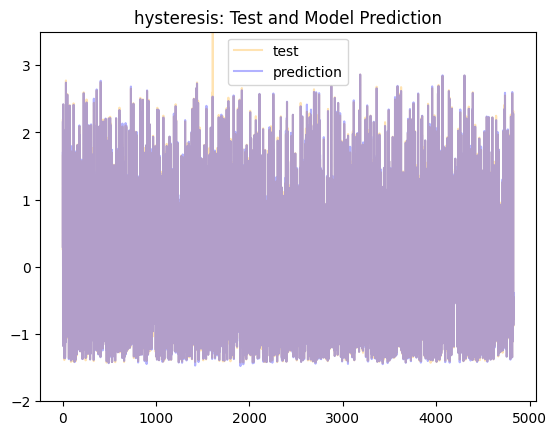

In [9]:
plt.plot(y_test, alpha = 0.3, color = 'orange', label = 'test')
plt.plot(y_pred_bad, alpha = 0.3, color = 'blue', label = 'prediction')
plt.legend()
plt.title(f"{variable}: Test and Model Prediction")
plt.ylim(-2, 3.5)

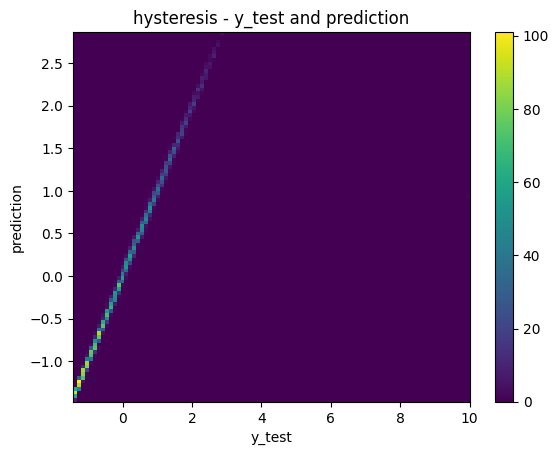

In [10]:
hist2d(variable, y_test, y_pred_bad)

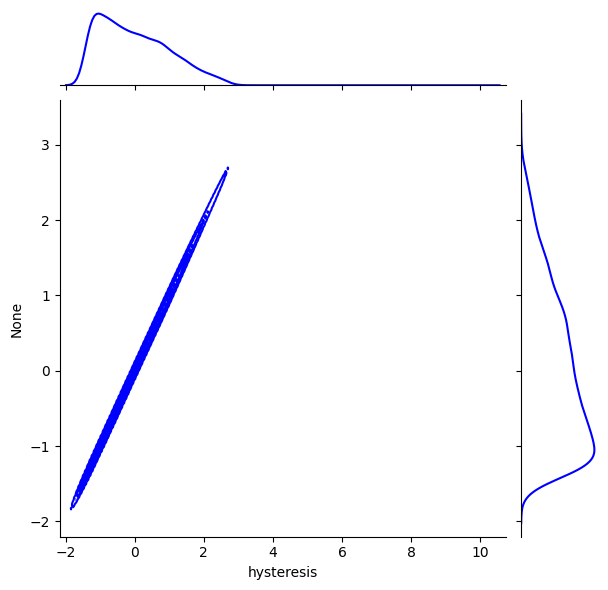

In [11]:
sns.jointplot(x = y_test, y = y_pred_bad, kind = 'kde', color = 'blue')

## Predictions With Grid Search

In [12]:
param_grid = {
    'iterations' : [50, 100],
    'learning_rate' : [0.01, 0.1],
    'depth' : [4, 6, 8],
    'l2_leaf_reg' : [1, 3, 5],
    'border_count' : [32, 64, 128]
}

In [13]:
grid_search = GridSearchCV(estimator = CatBoostRegressor(), 
                           param_grid = param_grid, 
                           cv = 3)

In [14]:
grid_search.fit(X_train, y_train)

0:	learn: 0.9944154	total: 1.88ms	remaining: 92ms
1:	learn: 0.9860851	total: 3.13ms	remaining: 75.2ms
2:	learn: 0.9778894	total: 4.59ms	remaining: 71.9ms
3:	learn: 0.9701117	total: 7.13ms	remaining: 82ms
4:	learn: 0.9624299	total: 10.9ms	remaining: 98.4ms
5:	learn: 0.9546721	total: 12.7ms	remaining: 93.2ms
6:	learn: 0.9468757	total: 14ms	remaining: 85.9ms
7:	learn: 0.9393104	total: 16ms	remaining: 84.1ms
8:	learn: 0.9315674	total: 17.7ms	remaining: 80.6ms
9:	learn: 0.9242261	total: 19.4ms	remaining: 77.5ms
10:	learn: 0.9171048	total: 22.7ms	remaining: 80.5ms
11:	learn: 0.9096401	total: 24.2ms	remaining: 76.6ms
12:	learn: 0.9024763	total: 26.7ms	remaining: 76ms
13:	learn: 0.8952896	total: 28.7ms	remaining: 73.8ms
14:	learn: 0.8879941	total: 29.9ms	remaining: 69.8ms
15:	learn: 0.8807992	total: 32.9ms	remaining: 69.8ms
16:	learn: 0.8736502	total: 34.9ms	remaining: 67.8ms
17:	learn: 0.8667162	total: 37.9ms	remaining: 67.3ms
18:	learn: 0.8597053	total: 39.2ms	remaining: 63.9ms
19:	learn: 0.

,estimator,<catboost.cor...x7f16d33ac910>
,param_grid,"{'border_count': [32, 64, ...], 'depth': [4, 6, ...], 'iterations': [50, 100], 'l2_leaf_reg': [1, 3, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False


In [15]:
grid_search.best_params_

{'border_count': 128,
 'depth': 8,
 'iterations': 100,
 'l2_leaf_reg': 1,
 'learning_rate': 0.1}

In [16]:
y_pred = grid_search.best_estimator_.predict(X_test)

In [17]:
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_pred)}")

Coefficient of determination: 0.9801268240856773
Mean squared error: 0.0202599673274813
Mean absolute percentage error: 0.209924733871624


(-2.0, 3.5)

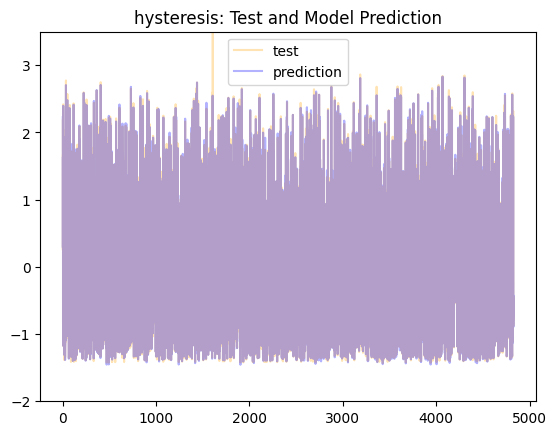

In [18]:
plt.plot(y_test, alpha = 0.3, color = 'orange', label = 'test')
plt.plot(y_pred, alpha = 0.3, color = 'blue', label = 'prediction')
plt.legend()
plt.title(f"{variable}: Test and Model Prediction")
plt.ylim(-2, 3.5)

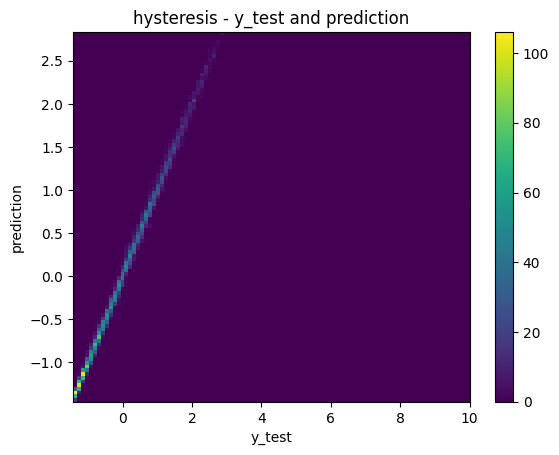

In [19]:
hist2d(variable, y_test, y_pred)

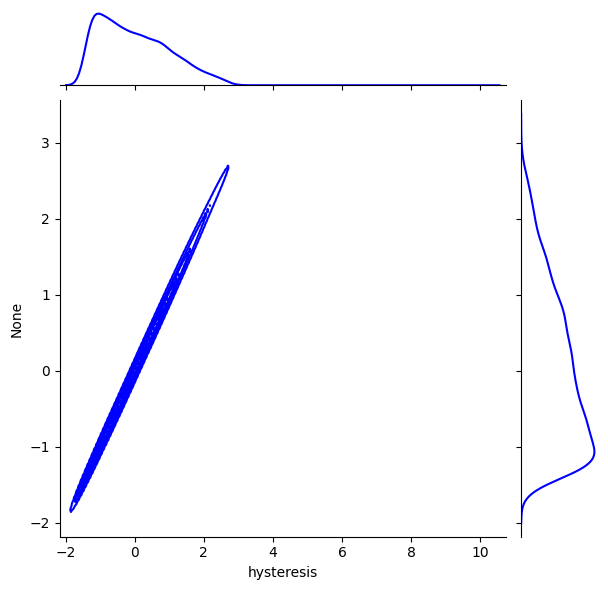

In [20]:
sns.jointplot(x = y_test, y = y_pred, kind = 'kde', color = 'blue')